Intrusion Detection Synthentic Dataset
=====

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

## Explorative Analysis

We load the dataset and split it into train/val split.

In [2]:
df = pd.read_csv("Train_data.csv", header=0)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [3]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see that there are many features that are not useful: `is_host_login`, `num_outbound_cmds`, ...

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

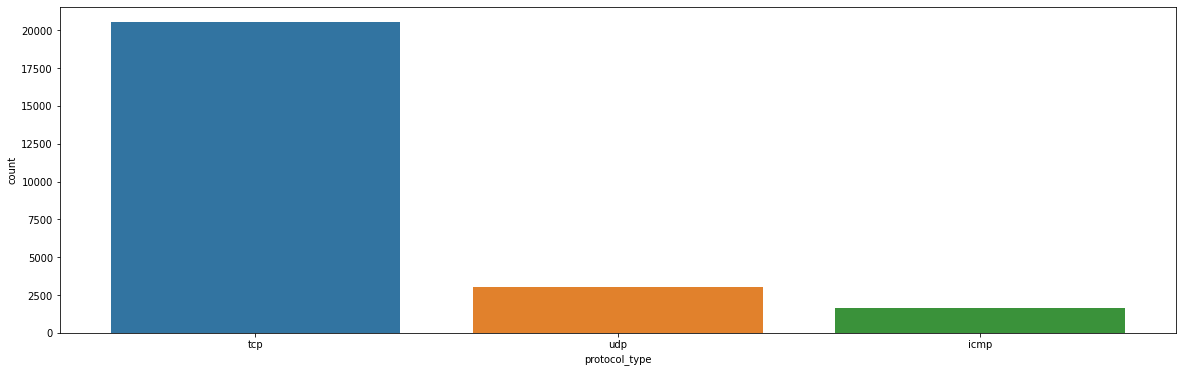

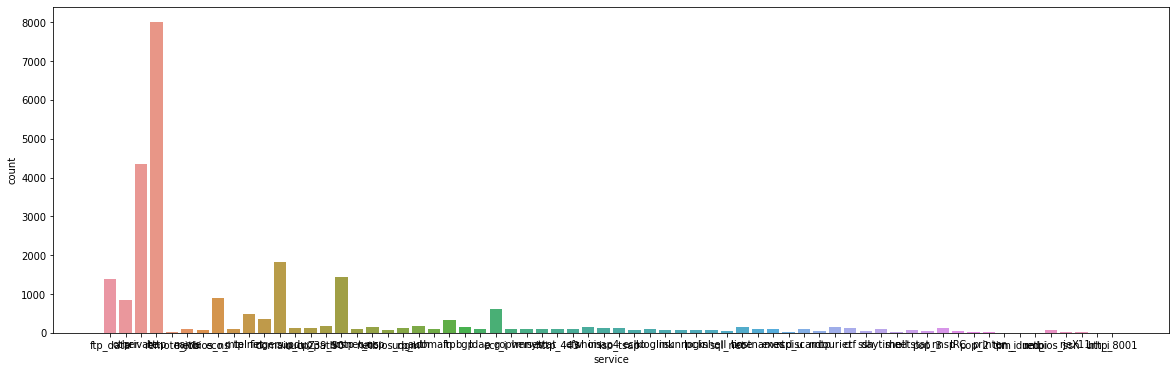

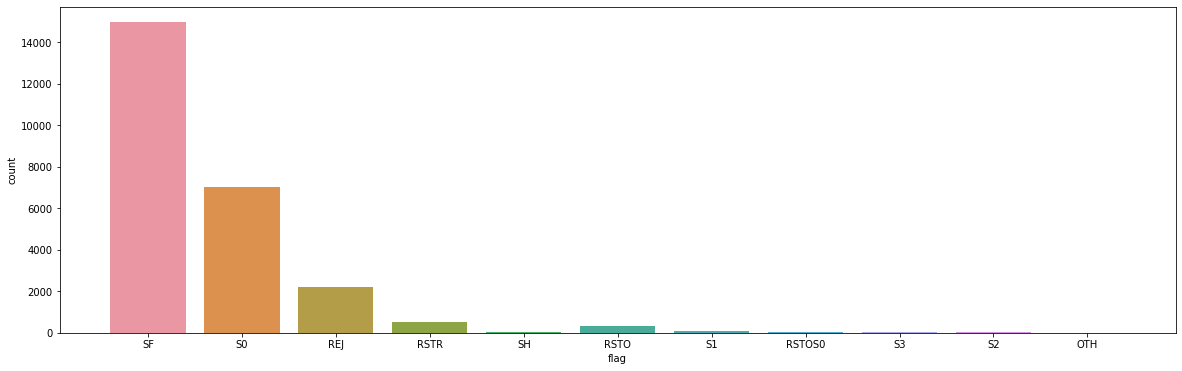

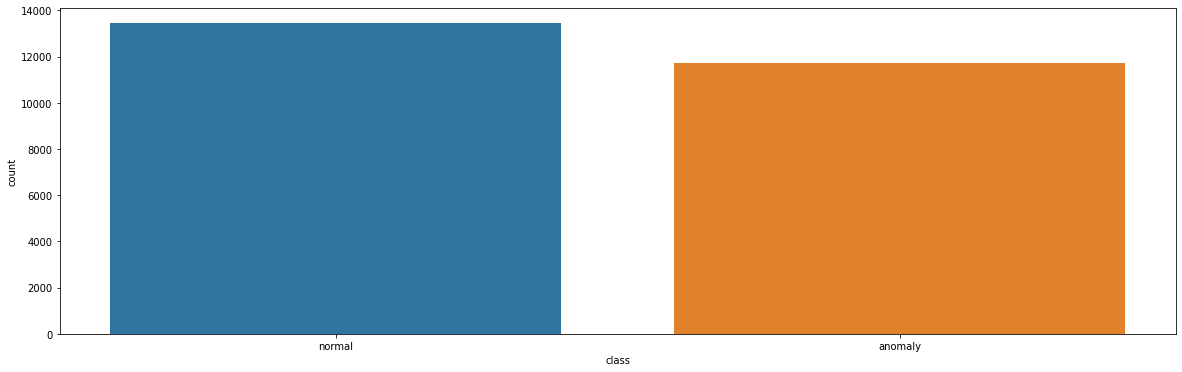

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns

# plotting categorical columns to see their distribution
for column in df.columns:
    if df[column].dtype == 'object':
        plt.figure(figsize=(20,6))
        sns.countplot(x=df[column])
        plt.plot()

We can see from above plot that this synthetic dataset is **balanced**. It is different from real-world datasets where anomalies is quite a few compared to normal ones.

We then divide our dataset in *training* and *validation* sets.

In [6]:
y = df['class']
X = df.drop('class', axis=1)
X = pd.get_dummies(X,columns=['protocol_type','service','flag'])
print(f"feature shape: {X.shape}")

feature shape: (25192, 118)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

# extracting only the normal network samples for training the autoencoder model
X_train_normal = X_train[y_train == 'normal']
X_val_normal = X_val[y_val == 'normal']

# extracting features that need scaling
to_norm = [feature for feature in df.columns if df[feature].dtype != 'object']
print(len(to_norm))
print(to_norm)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_normal[to_norm] = scaler.fit_transform(X_train_normal[to_norm])
X_val_normal[to_norm] = scaler.transform(X_val_normal[to_norm])

38
['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [8]:
X_train_normal.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
count,10121.000000,10121.000000,10121.000000,10121.000000,10121.0,10121.0,10121.000000,10121.000000,10121.000000,10121.000000,...,10121.000000,10121.000000,10121.0,10121.000000,10121.000000,10121.000000,10121.000000,10121.000000,10121.000000,10121.0
mean,0.006456,0.001407,0.000808,0.000099,0.0,0.0,0.007249,0.000362,0.704871,0.000548,...,0.038929,0.003656,0.0,0.002668,0.006521,0.006323,0.000988,0.000988,0.939828,0.0
std,0.047256,0.020284,0.011687,0.009940,0.0,0.0,0.075130,0.014439,0.456123,0.018338,...,0.193435,0.060355,0.0,0.051584,0.080494,0.079272,0.031419,0.031419,0.237817,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000016,0.000018,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
50%,0.000000,0.000030,0.000072,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
75%,0.000000,0.000042,0.000391,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [9]:
X_val_normal.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
count,3328.000000,3328.000000,3328.000000,3328.0,3328.0,3328.0,3328.000000,3328.000000,3328.000000,3328.000000,...,3328.000000,3328.000000,3328.0,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.000000,3328.0
mean,0.005024,0.001727,0.001007,0.0,0.0,0.0,0.008113,0.000501,0.721755,0.000203,...,0.036358,0.002103,0.0,0.000300,0.004207,0.006611,0.002103,0.001502,0.946815,0.0
std,0.038107,0.026090,0.018235,0.0,0.0,0.0,0.087637,0.015282,0.448202,0.005237,...,0.187208,0.045821,0.0,0.017334,0.064732,0.081048,0.045821,0.038738,0.224436,0.0
min,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000019,0.000020,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
50%,0.000000,0.000031,0.000077,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
75%,0.000000,0.000042,0.000428,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
max,0.616219,0.945561,0.999715,0.0,0.0,0.0,2.566667,0.666667,1.000000,0.177602,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


## Building the model: Auto-Encoder

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [11]:
# creating the autoencoder model
i = Input(shape=(X_train_normal.shape[1],))
encoder = Dense(64, activation='relu')(i)
encoder = Dense(32, activation='relu')(encoder)
code = Dense(16, activation='relu')(encoder)
decoder = Dense(32, activation='relu')(code)
decoder = Dense(64, activation='relu')(decoder)
decoder = Dense(X_train_normal.shape[1], activation='sigmoid')(decoder)

model = Model(i,decoder)

We will train the model under **recontruction** mode. Therefore, we need to use **MSE** loss function.

In [12]:
model.compile(optimizer='adam', loss='mse')

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 118)]             0         
                                                                 
 dense (Dense)               (None, 64)                7616      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 32)                544       
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 118)               7670  

### Training

In [15]:
r = model.fit(X_train_normal, X_train_normal, validation_data=(X_val_normal, X_val_normal), epochs=5)

Epoch 1/5
317/317 [==============================] - 1s 3ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 2/5
317/317 [==============================] - 1s 2ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 3/5
317/317 [==============================] - 1s 2ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 4/5
317/317 [==============================] - 1s 2ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 5/5
317/317 [==============================] - 1s 2ms/step - loss: 0.0018 - val_loss: 0.0019


[]

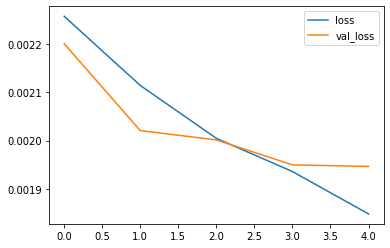

In [16]:
plt.figure()
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.plot()

Now, you can see that training Auto-Encoder is quite fast! because it is a recontruction setting, we need to find a threshold to make prediction of anomalies.

In [18]:
# reconstructing the train set
pred = model.predict(X_train_normal)
# finding the mean reconstruction error
np.mean(np.mean(np.power(pred - X_train_normal, 2), axis=1))

0.0018520295581492838

In [19]:
thres = 0.0018

### Validation in traing set

In [20]:
# now let's check the classification capability on train_set with both anomaly and normal samples
X_train[to_norm] = scaler.transform(X_train[to_norm])
pred = model.predict(X_train)
mse = np.mean(np.power(pred - X_train, 2), axis=1)
# classifying the samples based on threshold
pred_class = ['anomaly' if val > thres else 'normal' for val in mse]

In [25]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

print(confusion_matrix(y_train, pred_class))
print(f"Acc. = {accuracy_score(y_train, pred_class)*100}[%], F1 = {f1_score(y_train, pred_class, pos_label='anomaly')*100}[%")

[[8520  253]
 [1659 8462]]
Acc. = 89.88038530750502[%], F1 = 89.9113550021106[%


### Validation in validation set

In [26]:
X_val[to_norm] = scaler.transform(X_val[to_norm])
pred = model.predict(X_val)
mse = np.mean(np.power(pred - X_val, 2), axis=1)
# classifying the samples based on threshold
pred_class = ['anomaly' if val > thres else 'normal' for val in mse]

In [28]:
print(confusion_matrix(y_val, pred_class))
print(f"Acc. = {accuracy_score(y_val, pred_class)*100}[%], F1 = {f1_score(y_val, pred_class, pos_label='anomaly')*100}[%")

[[2901   69]
 [ 563 2765]]
Acc. = 89.96506827564306[%], F1 = 90.17718371153248[%


## Building another model: Random Forest

In [44]:
rf = RandomForestClassifier(n_estimators=100, criterion='gini')

### Training

In [45]:
y_train_df = (y_train == 'anomaly').astype('float')
y_val_df = (y_val == 'anomaly').astype('float')
y_train_num = np.array(y_train_df.to_list())
y_val_num = np.array(y_val_df.to_list())

In [46]:
print(f"X_train's shape: {X_train.shape}, y_train's shape: {y_train.shape}")

X_train's shape: (18894, 118), y_train's shape: (18894,)


In [47]:
rf.fit(X=X_train, y=y_train_num)

RandomForestClassifier()

### Validation in training set

In [48]:
y_pred = rf.predict(X_train)
print(confusion_matrix(y_train_num, y_pred))
print(f"Acc. = {accuracy_score(y_train_num, y_pred)*100}[%], F1 = {f1_score(y_train_num, y_pred, pos_label=1)*100}[%]")


[[10121     0]
 [    0  8773]]
Acc. = 100.0[%], F1 = 100.0[%]


### Validation in validation set

In [49]:
y_pred = rf.predict(X_val)
print(confusion_matrix(y_val_num, y_pred))
print(f"Acc. = {accuracy_score(y_val_num, y_pred)*100}[%], F1 = {f1_score(y_val_num, y_pred, pos_label=1)*100}[%]")


[[3321    7]
 [  14 2956]]
Acc. = 99.66656081295649[%], F1 = 99.64604753076016[%]


We can see **Random Forest** outperformed neural network based models like **Auto-Encoder**.